In [37]:
#Baseline bitexts (PQ64)
import pandas as pd

finnish_PQ64 = pd.read_csv("/checkpoints/kevinheffernan/seamless/nmt.23h1.seamless-faiss/baseline/fin/eng0-fin.TH-1.TH-1.06.bitext.TH-1.TH-1.06.bitext.tsv.gz",compression="gzip",on_bad_lines="skip", header=None,sep="\t",nrows=5_000_000)
#hindu_PQ64 = pd.read_csv("checkpoints/kevinheffernan/seamless/nmt.23h1.seamless-faiss/baseline/hin/eng0-hin.TH-1.TH-1.09.bitext.TH-1.TH-1.09.bitext.tsv.gz",compression="gzip",on_bad_lines="skip", header=0,sep="\t")
finnish_PQ512 = pd.read_csv("/checkpoints/kevinheffernan/seamless/nmt.23h1.seamless-faiss/faiss/fin/eng0-fin.TH-1.TH-1.13.bitext.TH-1.TH-1.13.bitext.tsv.gz",compression="gzip",on_bad_lines="skip",  header=None,sep="\t",nrows=5_000_000)


In [38]:
finnish_PQ64.columns=["margin score","english","finnish"]
print(finnish_PQ64["margin score"].describe())
finnish_PQ512.columns=["margin score","english","finnish"]
print(finnish_PQ512["margin score"].describe())

count    5.000000e+06
mean     1.189135e+00
std      5.941186e-02
min      1.141886e+00
25%      1.151182e+00
50%      1.166302e+00
75%      1.200995e+00
max      1.622480e+00
Name: margin score, dtype: float64
count    5.000000e+06
mean     1.382495e+00
std      1.706184e-01
min      1.252658e+00
25%      1.278338e+00
50%      1.320269e+00
75%      1.412912e+00
max      3.209458e+00
Name: margin score, dtype: float64


In [38]:
finnish_PQ64.columns=["margin score","english","finnish"]
print(finnish_PQ64["margin score"].describe())
finnish_PQ512.columns=["margin score","english","finnish"]
print(finnish_PQ512["margin score"].describe())

count    5.000000e+06
mean     1.189135e+00
std      5.941186e-02
min      1.141886e+00
25%      1.151182e+00
50%      1.166302e+00
75%      1.200995e+00
max      1.622480e+00
Name: margin score, dtype: float64
count    5.000000e+06
mean     1.382495e+00
std      1.706184e-01
min      1.252658e+00
25%      1.278338e+00
50%      1.320269e+00
75%      1.412912e+00
max      3.209458e+00
Name: margin score, dtype: float64


In [61]:
stats_512=finnish_PQ512.groupby(["finnish"]).size().sort_values(ascending=False)

In [63]:
stats_64=finnish_PQ64.groupby(["finnish"]).size().sort_values(ascending=False)

In [94]:

finnish_counts_512=pd.DataFrame({'finnish':stats_512.index, 'something':stats_512.values})
finnish_counts_64=pd.DataFrame({'finnish':stats_64.index, 'counts':stats_64.values})


<Axes: ylabel='count'>

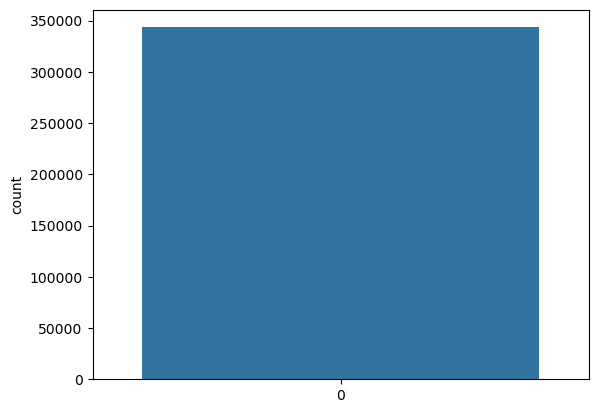

In [95]:
import seaborn as sns
filtered =finnish_counts_512[finnish_counts_512["something"]>2]

sns.countplot(filtered["something"])

In [19]:
#newdf = finnish_PQ64.join(finnish_PQ512,on=["english","finnish"])
new_df = pd.merge(finnish_PQ64, finnish_PQ512,  how='inner', left_on=["english"], right_on = ["english"])

In [43]:
4699546/5000000

0.9399092

In [20]:
new_df

,margin score_x,english,finnish_x,margin score_y,finnish_y
0,1.622480,And him & I are on a mountain top and we just ...,"Ja hän ja minä olemme vuorenhuipulla, ja me va...",2.800282,"Ja hän ja minä olemme vuorenhuipulla, ja me va..."
1,1.606811,The best antidote I know of to the kind of dis...,Paras vastamyrkky minkä minä tiedän sellaisell...,2.791727,Paras vastamyrkky minkä minä tiedän sellaisell...
2,1.603561,Catherine Ann's messsage is that many of us th...,"Catherine Ann'in viesti on, että monet meistä ...",2.728350,"Catherine Ann'in viesti on, että monet meistä ..."
3,1.602993,"But like many other places all over the world,...",Mutta kuten monet muutkin paikat kaikkialla ma...,2.670596,Mutta kuten monet muutkin paikat kaikkialla ma...
4,1.598698,FOX (Russia) - an elite special unit of female...,FOX (Venäjä) - eliitti erityinen yksikkö naist...,2.724795,FOX (Venäjä) - eliitti erityinen yksikkö naist...
...,...,...,...,...,...
6092510,1.122526,"When Jesus was forty days old, Mary and Joseph...",Neljäkymmentä päivää myöhemmin Joosef ja Maria...,1.244265,Neljäkymmentä päivää myöhemmin Joosef ja Maria...
6092511,1.122526,"DILI-B1 The Diploma of the Italian Language ""F...",80 oppituntia valmistautumista kahden Diploma ...,1.264940,80 oppituntia valmistautumista kahden Diploma ...
6092512,1.122526,"In Job 35:10 - 11, we read that man knows more...","Nyt tässä Jobin kirjan kohdassa kerrotaan, ett...",1.206857,"Nyt tässä Jobin kirjan kohdassa kerrotaan, ett..."
6092513,1.122526,But the recycling rate has been largely flat f...,Kierrätysprosentti on pysynyt samansuuruisena ...,1.229639,Kierrätysprosentti on pysynyt samansuuruisena ...


In [22]:
 filtered=new_df[new_df['finnish_x'] != new_df['finnish_y']]

In [35]:
filtered

,margin score_x,english,finnish_x,margin score_y,finnish_y
94,1.567266,"Sadly, the insurance companies here in Michiga...",Valitettavasti Michiganissa sijaitsevat vakuut...,1.263526,"No viime viikolla sain hieman shokki, kun minu..."
95,1.182666,"Sadly, the insurance companies here in Michiga...","No viime viikolla sain hieman shokki, kun minu...",2.372352,Valitettavasti Michiganissa sijaitsevat vakuut...
99,1.133870,"According to an article on Inc, Sabetian didn'...",Inc: n artikkelin mukaan Sabetian aloitti ensi...,2.743185,Inc: n artikkelin mukaan Sabetian ei halunnut ...
151,1.560399,"In short, what God had given men and angels Lu...","Lyhyesti sanottuna, mitä Jumala oli antanut ih...",2.271889,"[s.615:1_54:2.4] Lyhyesti sanottuna, mitä Juma..."
152,1.560399,"In short, what God had given men and angels Lu...","Lyhyesti sanottuna, mitä Jumala oli antanut ih...",2.225545,"(615.1) 54:2.4 Lyhyesti sanottuna, mitä Jumal..."
...,...,...,...,...,...
6092463,1.122526,"Professor Matti Tolvanen, Professor of Crimina...",Itä-Suomen yliopiston rikos- ja prosessioikeud...,1.206590,Itä-Suomen yliopiston rikos- ja prosessioikeud...
6092464,1.122526,"Professor Matti Tolvanen, Professor of Crimina...",Itä-Suomen yliopiston rikos- ja prosessioikeud...,1.202981,Itä-Suomen yliopiston rikos- ja prosessioikeud...
6092467,1.122526,The movie follows Danish army commander Claus ...,Elokuvan päähenkilöitä ovat komppanianjohtaja ...,1.208000,Keskushenkilöksi nousee vänrikki (sekondløjtna...
6092475,1.122526,"Chapter-ending summaries, glossary terms, and ...","Lukujen lopussa olevat yhteenvedot, lukujen av...",1.207292,"Lukujan lopussa olevat yhteenvedot, lukujen av..."
